<a href="https://colab.research.google.com/github/nafanur/CNN_image_classification/blob/main/UAS_ADTT_NAFA_NURHANIFAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network for image classification

## **Importing the libraries**

Import beberapa library phyton yang dibutuhkan untuk klasifikasi gambar menggunakan metode CNN

In [ ]:
# untuk membangun neural network
import tensorflow as tf
# untuk membangun Convolutional neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# hrus mengimport "Conv2D, MaxPooling2D, Flatten" sblm import "Dense"
# flatten: mengubah matriks menjadi vektor dan untuk mengirim input ke neural network
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator: untuk membaca semua gambar
tf.__version__ # cek versi tensorflow

# untuk memvisualisasikan beberapa grafik
import matplotlib.pyplot as plt
import seaborn as sns

# untuk mengekstrak kumpulan data kita
import zipfile
import numpy as np
import cv2 # untuk menampilkan gambar
from google.colab.patches import cv2_imshow


# 1. Baca Gambar
## **Loading the images**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Computer Vision Masterclass/Datasets/homer_bart_2.zip'
# ekstrak file zip
# folder "homer_bart_2.zip" sdh di ekstrak ke drive.
# folder ini berbeda dengan homer_bart_2 sebelumnya, karena tensorflow itu perlu data training dan data testing
# jadi di folder yg ada di drive itu sudah di split menjadi data training dan data testing
# zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

ValueError: Attempt to use ZIP archive that was already closed

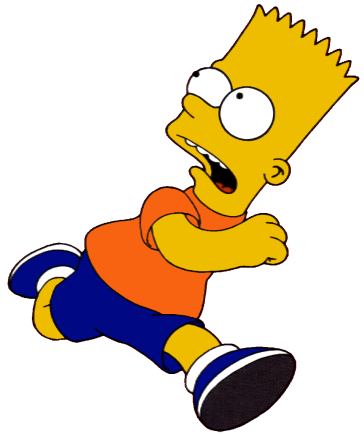

In [ ]:
# melihat beberapa gambar Bart
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart100.bmp')

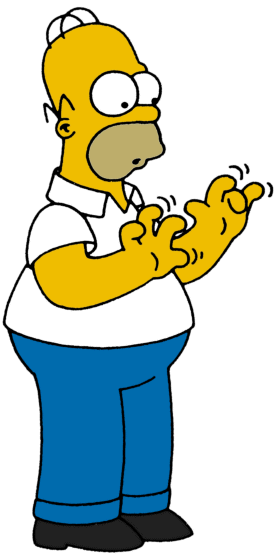

In [ ]:
# melihat gambar Homer
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer100.bmp')

# 2. Split data (mendefinisikan) menjadi Data Training dan Data Testing dengan library tensorflow

## **Train and test set**

### prepocessing data pada training data set

In [ ]:
# PREPOCESSING DATA WITH ImageDataGenerator
# ImageDataGenerator itu banyak banget parameternya, tapi
# kita bisa mengatur beberapa parameter saja untuk membuat modifikasi pada gambar aslinya,
# ini sangat berguna saat kita hanya memiliki sedikit gambar untuk setiap kelas.
# Seperti yang kamu lihat di sini, ada banyak parameter lain yang bisa diatur.
# Dengan menggunakan fungsi / parameter ini, selain gambar asli,
# kita juga akan memiliki gambar baru dengan penerapan pre-processing ini.
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7, # rotasi gambar
                                        horizontal_flip=True, #gambar nya horizontal
                                        zoom_range=0.2) # zoom gambarnya


In [ ]:
# batch_size=8: Menunjukkan bahwa gambar-gambar akan diakses setiap 8, atau
# model akan memproses 8 gambar sekaligus saat training.
# Karena kita memiliki sedikit gambar, kita pakai nilai kecil (8) ini.
# Seperti namanya, parameter "shuffle" akan mencampur gambar-gambar,
# mereka akan diakses dalam urutan yang benar-benar acak untuk mencegah neural network menghafal urutan gambar.
# Jika tidak menggunakan "shuffle = TRUE", neural network bisa mempelajari urutan gambar, bukan fitur dari gambar itu sendiri.
train_dataset = training_generator.flow_from_directory('/content/homer_bart_2/training_set',
                                                        target_size = (64, 64), #menyamakan ukuran semua gambar yang ada di folder ini
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)
# low_from_directory: untuk membaca semua file yg ada di dalam folder
# saat bekerja dgn metode CNN dan akan mendefinisikan beberapa layer yg berbeda,
# pastikan semua ukuran gambar < "target_size".
# Karena klo tidak (> "target_size"), maka akan memakan waktu yg lama untuk proses training
# class_mode = 'biner': jika kita ingin mengklasifikasikan 2 gambar menjadi 2 kelas saja (contoh: Homer and Bart)
# class_mode = 'biner': jika kita ingin mengklasifikasikan beberapa gambar menjadi beberapa kelas, 2 kelas msih bisa gunakan ini

Found 215 images belonging to 2 classes.


Jadi, ada 215 gambar pada folder training_set dan dibagi menjadi 2 kelas yaitu Homer and Bart

In [ ]:
#  mendefinisikan jumlah kelas yg ada di dalam folder training_set
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
train_dataset.class_indicesS

{'bart': 0, 'homer': 1}

### prepocessing data pada testing data set

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255) # untuk menormalkan gambar
# parameter ImageDataGenerator yg dicantumkan pada training_set itu
# berbeda dgn parameter yg dicantumkan di testing_set.
# karena kita menghasilkan beberapa gambar baru untuk melatih/train neural network.
# Saat kita menguji/testing neural network, kita tidak perlu membuat gambar baru

# Untuk pengujian model (testing), kita set parameter "shuffle" = FALSE,
# karena saat testing, urutan gambar tidak berpengaruh.
# Jika kita biarkan "shuffle" = TRUE,
# kita tidak akan bisa mengaitkan prediksi dengan output yang diharapkan.
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


#### Penjelasan batch_size = 1 pada testing_set,
karena kita ingin mencocokkan satu per satu gambar dengan hasil prediksi-nya atau kita akan menguji gambar satu per satu dengan model CNN.

Kenapa saat training, batch_size = 8 ?
Saat training: Tujuan kita bukan mengevaluasi tiap gambar, tapi melatih model dengan sekelompok gambar. Maka batch_size boleh besar, agar pelatihan lebih cepat dan efisien

Output testing: "Found 54 images belonging to 2 classes."
ada 54 gambar pada folder test_set yang dibagi menjadi 2 kelas yaitu Homer and bart

# 3. Buat CNN dengan Data Training dengan tahapan:

a. Lakuan feature detector yang menghasilkan feature maps

b. Lakukan pooling

c. Lakukan flattening

d. Lakukan dense neural network

## Building and training the neural network

In [ ]:
# ukuran target_size
64 * 64

4096

In [ ]:
14 * 14 * 32

6272

In [ ]:
# mendefinisikan jumlah neuron di hidden layer (input layer) neural network
# perhitungannya: (jumlah input + jumlah output)/2
(6272 + 2) / 2

3137.0

In [ ]:
# mendefinisikan neural network dengan tensorflow
network = Sequential()
# ada beberapa layer di metode CNN:
# layar pertama di metode CNN: Convolutional layer
# Convolutional layer untuk menentukan serangkaian filter untuk memproses gambar.

# convolutional layer pertama
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (64,64,3)))
network.add(MaxPooling2D(pool_size=(2,2)))
# kernel_size = (3,3) itu memang default ukuran bentuk detektor fitur
## input_shape = (64,64,3), karena kita punya gambar yg berwarna,
## jadi perlu mendifinisikan dgn urutan = (red,green,blue)
## dan 64,64 harus sama persis dgn nilai target_size yg ada di training_set dan test_set
### pool_size=(2,2) = mengatur ukuran matriks (2x2)

# convolutional layer kedua
# input_shape hanya didefinisikan di layer pertama saja
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

# convolutional layer ketiga
network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
# jika sampai ke layer ketiga convolutional, maka hasilnya akan jauh lebih baik

# Bagian akhir dari struktur CNN adalah layer berikut ini (flatten) tidak ada parameter,
# hanya mengkonversi dari matriks ke vektor
network.add(Flatten())
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax')) # bagian output layer; (units=2) menyesuaikan dgn nilai "class_mode"
# softmax: satu probabilitas / peluang untuk setiap kelas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3137)           │     3,616,961 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,486,535 (51.45 MB)

 Trainable params: 13,486,535 (51.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# mengkompilasi (optimalkan) network
# loss= 'categorical_crossentropy': menyesuaikan dengan class_mode yg di atas.
# klo class_mode= "biner", maka " loss='biner_crossentropy' "
## metrics = ['accuracy']: isi matriks nya akurasi
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# variabel "history": untuk mengembalikan hasil
history = network.fit(train_dataset,epochs=50, validation_data=test_dataset)
# epochs=50; angka yg sama yang digunakan dalam neural network pendekatan lainnya.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 297ms/step - accuracy: 0.5331 - loss: 0.8374 - val_accuracy: 0.5185 - val_loss: 0.8991
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.6446 - loss: 0.6267 - val_accuracy: 0.7593 - val_loss: 0.5332
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.7310 - loss: 0.5106 - val_accuracy: 0.5926 - val_loss: 0.7161
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.6856 - loss: 0.5858 - val_accuracy: 0.8333 - val_loss: 0.4524
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.8179 - loss: 0.4260 - val_accuracy: 0.8148 - val_loss: 0.3789
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.8281 - loss: 0.4041 - val_accuracy: 0.5741 - val_loss: 1.5861
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.8732 - loss: 0.3682 - val_accuracy: 0.8333 - val_loss: 0.5632
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.8823 - loss: 0.3342 - val_accuracy: 0.8889 - va

Hasil model CNN nya cukup bagus, dimana dengan akurasi: 0,9702 dan kerugian (loss): 0,0417. Namun, kita masih perlu menguji model dengan data yang ada di testing_set.

# 3. Evaluasi model yang sudah dibuat dengan Data Testing dan laporkan matrix confusion yang diperoleh

## **Evaluating the neural network**

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

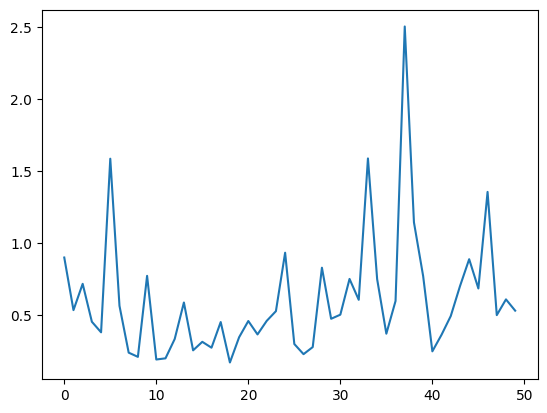

In [ ]:
plt.plot(history.history['val_loss']);

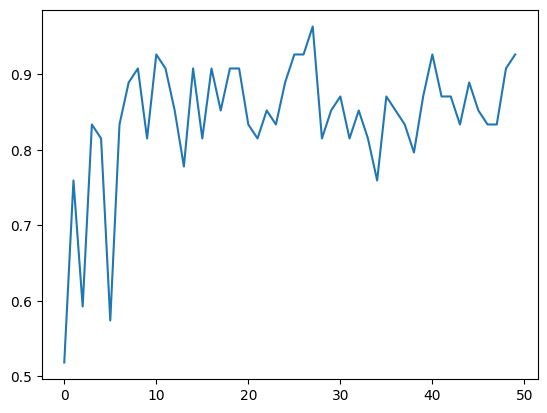

In [ ]:
plt.plot(history.history['val_accuracy']);

In [ ]:
# melihat apakah gambar nya itu masuk ke kelas Bart atau Homer
# ada 54 gambar yg ada di folder testing_dataset
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
# menerapkan model ke test_dataset
## kita memiliki 2 neuron di output layer dgn "activation=softmax" yg telah didefinisikan sebelumnya,
## maka akan menghasilkan probabilitas untuk masing2 neuron ini.
## kolom pertama: probabilitas untuk gambar Bart; kolom kedua:  probabilitas untuk gambar Homer
predictions = network.predict(test_dataset)
predictions

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


array([[1.0000000e+00, 1.1613043e-30],
       [1.0000000e+00, 5.9720656e-25],
       [9.9999976e-01, 2.8226816e-07],
       [1.0000000e+00, 7.9409175e-23],
       [1.0000000e+00, 5.8669830e-30],
       [1.0000000e+00, 9.6210451e-10],
       [1.0000000e+00, 2.5477372e-11],
       [8.4776968e-01, 1.5223032e-01],
       [6.2164865e-02, 9.3783516e-01],
       [1.0000000e+00, 2.4614999e-10],
       [1.0000000e+00, 2.5563539e-14],
       [1.0000000e+00, 3.1666714e-12],
       [1.0000000e+00, 2.7190161e-09],
       [1.0000000e+00, 1.0403703e-09],
       [1.0000000e+00, 2.2624284e-11],
       [1.0000000e+00, 7.8324776e-19],
       [1.1764162e-01, 8.8235843e-01],
       [1.0000000e+00, 4.2272879e-19],
       [9.9999976e-01, 2.2610219e-07],
       [1.0000000e+00, 2.3170249e-27],
       [1.0000000e+00, 3.2104788e-11],
       [1.0000000e+00, 6.4880273e-27],
       [1.0000000e+00, 4.5479632e-14],
       [9.9956626e-01, 4.3370403e-04],
       [1.0000000e+00, 1.9438515e-18],
       [1.0000000e+00, 5.

**Interpretasi predictions: **

jika posisi nol (0) di kiri (posisi pertama) lebih besar dibandingkan sebelah kanan, maka gambar tersebut akan diklasifikasikan sebagai Bart.  

jika posisi nol (0) di kanan (posisi kedua) lebih besar dibandingkan sebelah kiri, maka gambar tersebut akan diklasifikasikan sebagai Homer.  

In [ ]:
# untuk menggunakan activation = "softmax", secara fungsional
# kita perlu menerapkan pemrosesan tambahan dalam prediksi variabel untuk mengekstrak indeks dgn maximum value (np.argmax)
predictions = np.argmax(predictions, axis = 1)  # karena ingin mengakses masing-masing kolom
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# membandingkan apakah predictions sama dgn testing_dataset kita
test_dataset.classes
# kesimpulan: sama, algoritma mengklasifikasikan gambar pertama sudah benar.
# Contoh untuk gambar terakhir, itu output yg diharapkan adalah 1 (Homer) dan di "predictions" juga output nya 1
## Jadi, neural network sudah dapat memprediksi gambar dengan tepat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# melihat akurasi: untuk membandingkan semua output nya
# metode 1: akurasi nya 0.68
# metode 2: akurasi nya 0.88
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.9259259259259259

akurasi: 0.9259, sudah jauh lebih baik daripada percobaan lainnya. Akurasi ini nilainya selalu berubah-ubah.

<Axes: >

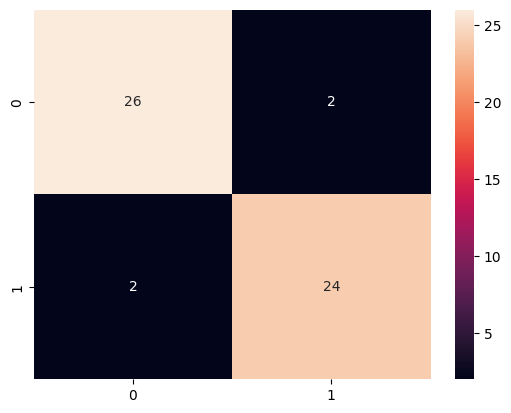

In [ ]:
# membuat Convolutional matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

### Interpretasi heatmap:

Dari 54 gambar yang ada di testing_set, gambar Bart yg diprediksi benar (masuk kelas Bart) sebanyak 26 gambar dan hanya 2 gambar saja yg diprediksi salah (masuk kelas Homer).

Gambar Homer yg diprediksi benar (masuk kelas Homer) sebanyak 24 gambar dan hanya 2 gambar saja yg diprediksi salah (masuk kelas Bart).


In [ ]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
# NILAI INI BERUBAH-UBAH
## The neural network can correctly identify 75% of the bart images and when it
## identifies these bart images, it is correct 68% of the time
## We can conclude that this neural network is better for classifying bart images, as
## we saw in the confusion matrix
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.92      0.92      0.92        26

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



### interpretasi presisi dan recall:
- Precision (0)= 93% berarti ketika model mengatakan bahwa "ini Bart" dari semua gambar Bart yg ada di dalam folder testing_set, 93% berhasil prediksinya dikenali sebagai “Bart”.

- Precision (1)= 92% berarti ketika model mengatakan bahwa "ini Homer" dari semua gambar Homer yg ada di dalam folder testing_set, 92% berhasil prediksinya dikenali sebagai “Homer”.

Recall:
- Untuk Bart: Dari 28 gambar Bart asli, 93% berhasil dikenali oleh model sebagai Bart.
- Untuk Homer: Dari 26 gambar Homer asli, 92% dikenali dengan benar.

Akurasi model: 93%
Artinya dari 54 gambar uji, sekitar 50 berhasil diklasifikasikan dengan benar.

Model CNN ini cukup imbang dalam mengenali gambar Bart dan Homer.
Bart dikenali sedikit lebih baik dibanding Homer, namun selisihnya sangat kecil (hanya 1%).
Kita bisa bilang model ini bekerja sangat baik dan cocok digunakan untuk membedakan kedua karakter tersebut.

## Saving and loading the model

In [ ]:
# This step is very important, because when you are satisfied with the results you
# can save the model to use at another time (as the neural network training can take,
# there is no need to train the algori. Assuming you are a consultant to a company,
# you create the neural network and send the weights to the developers to put the
# neural network into production (a graphical interface could be made for example)

In [ ]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

In [ ]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_9", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "name": "input_layer_8"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_25", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.in

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
network_loaded.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 3137)           │     3,616,961 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,486,535 (51.45 MB)

 Trainable params: 13,486,535 (51.45 MB)

 Non-trainable params: 0 (0.00 B)

## Classifying one single image

In [ ]:
image = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')

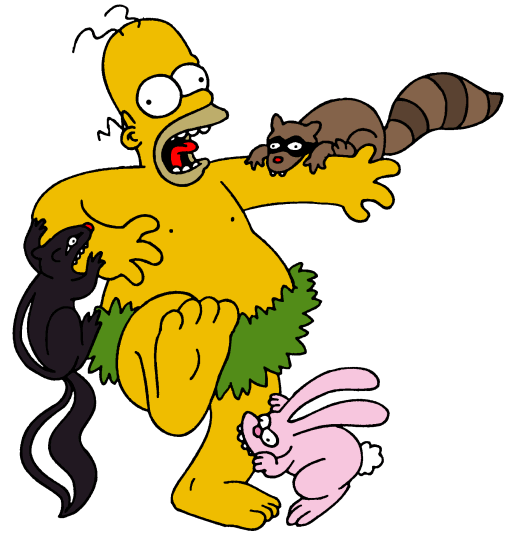

In [ ]:
cv2_imshow(image)

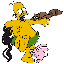

In [ ]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
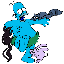

In [ ]:
image

In [ ]:
image = image / 255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
image.shape

(64, 64, 3)

In [ ]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [ ]:
result = network_loaded(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.4399261e-05, 9.9998558e-01]], dtype=float32)>

In [ ]:
result = np.argmax(result)
result

np.int64(1)

In [ ]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
if result == 0:
  print('Bart')
else:
  print('Homer')

# KESIMPULAN: model CNN sudah tepat memprediksi bahwa gambar ini benar-benar Homer.

Homer


In [ ]:
# COBA CONTOH LAIN

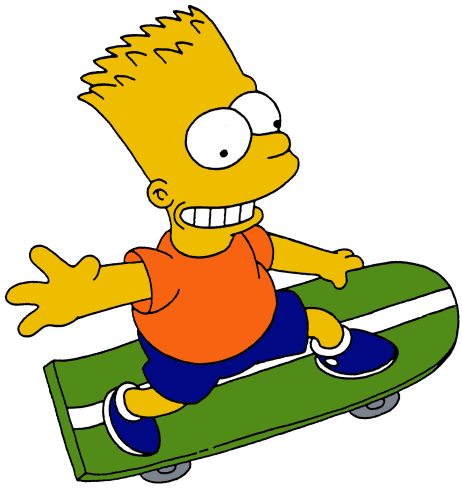

In [ ]:
image2 = cv2.imread('/content/homer_bart_2/test_set/bart/bart13.bmp')
cv2_imshow(image2)

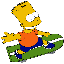

In [ ]:
image2 = cv2.resize(image2, (64, 64))
cv2_imshow(image2)

In [ ]:
image2 = image2 / 255
image2

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
image2.shape

(64, 64, 3)

In [ ]:
image2 = image2.reshape(-1, 64, 64, 3)
image2.shape

(1, 64, 64, 3)

In [ ]:
result1 = network_loaded(image2)
result1

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[7.7918119e-04, 9.9922085e-01]], dtype=float32)>

In [ ]:
result1 = np.argmax(result1)
result1

np.int64(1)

In [ ]:
if result1 == 0:
  print('Bart')
else:
  print('Homer')

# kesimpulan: model CNN salah memprediksi gambar bart13.bmp (seharusnya itu masuk kelas Bart bukan kelas Homer)

Homer
